In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
np.seterr(invalid='ignore')
from PPP import PPP
from defense_PPP import defense_PPP
from court import create_court
import matplotlib as mpl
import matplotlib.pyplot as plt
import json
import plotly.graph_objects as go
pd.options.display.max_columns = 999
from get_stats import get_stats

game = '11.12.23_Rockets'
total = '!season_totals'

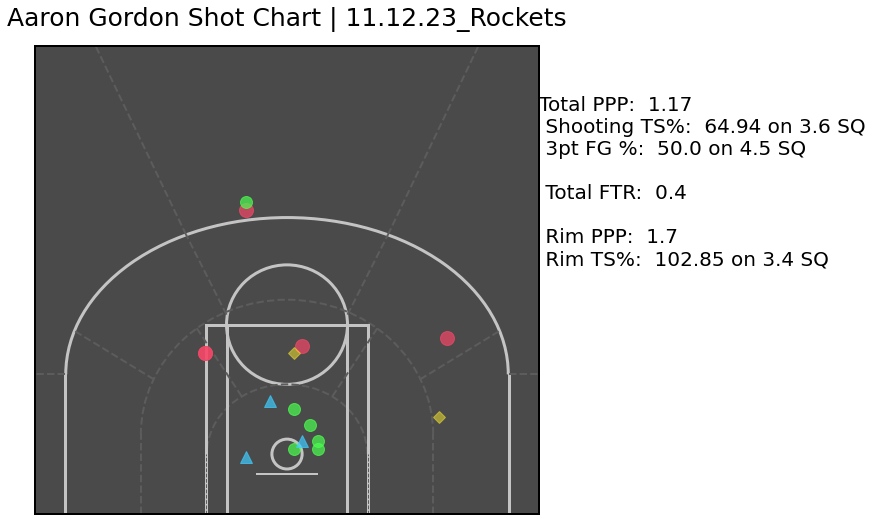

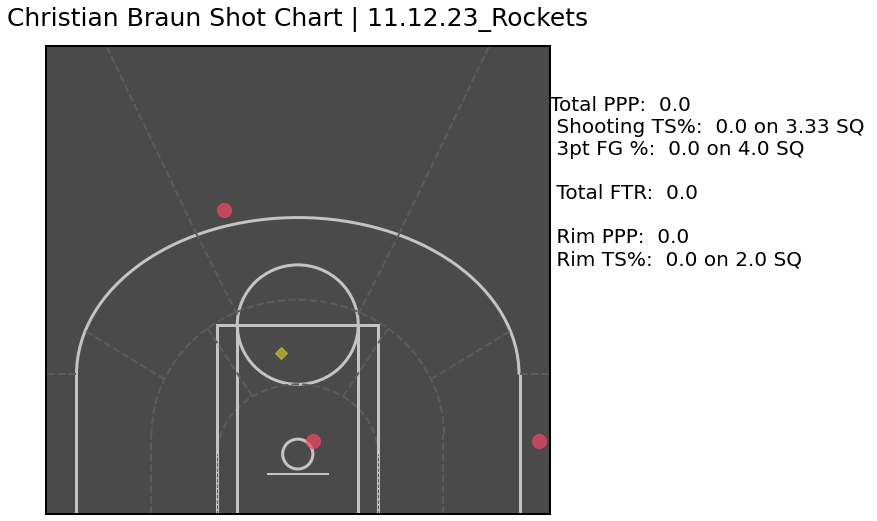

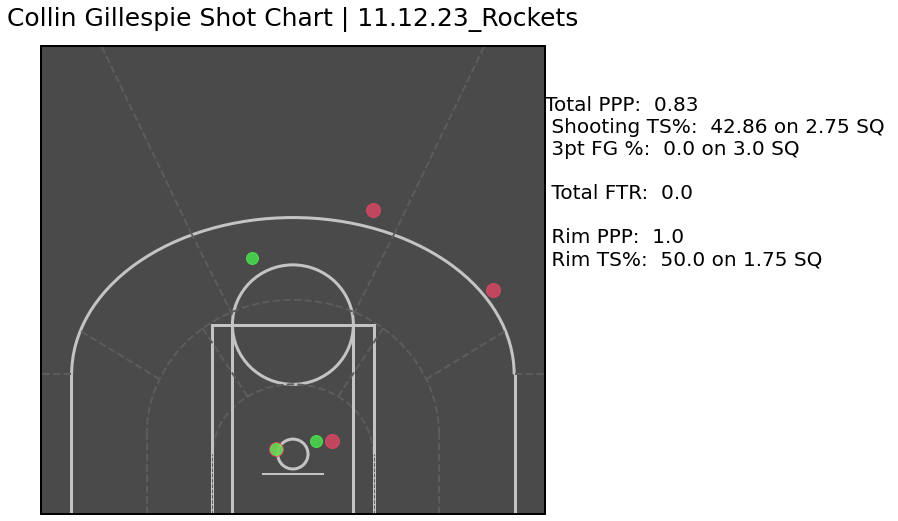

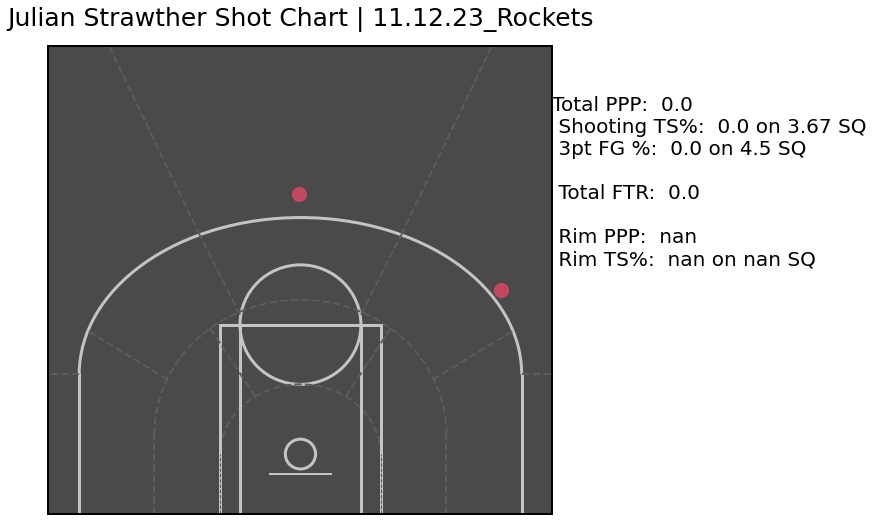

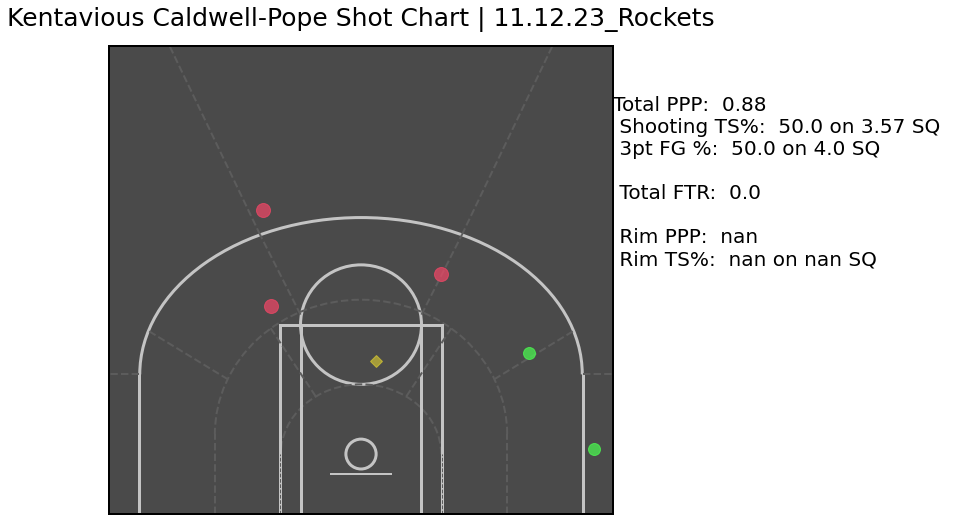

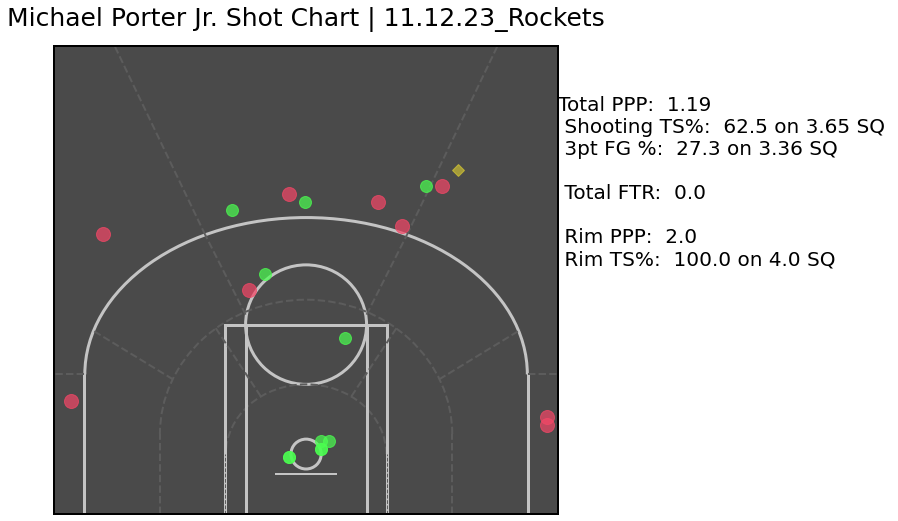

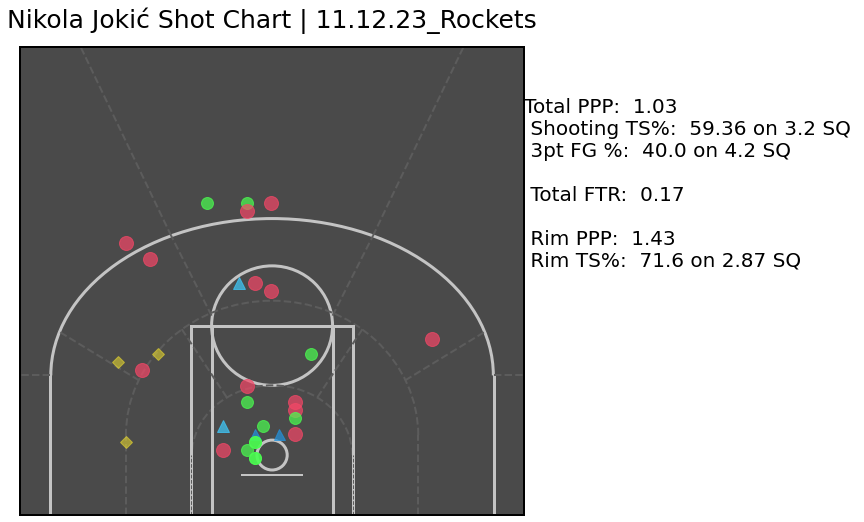

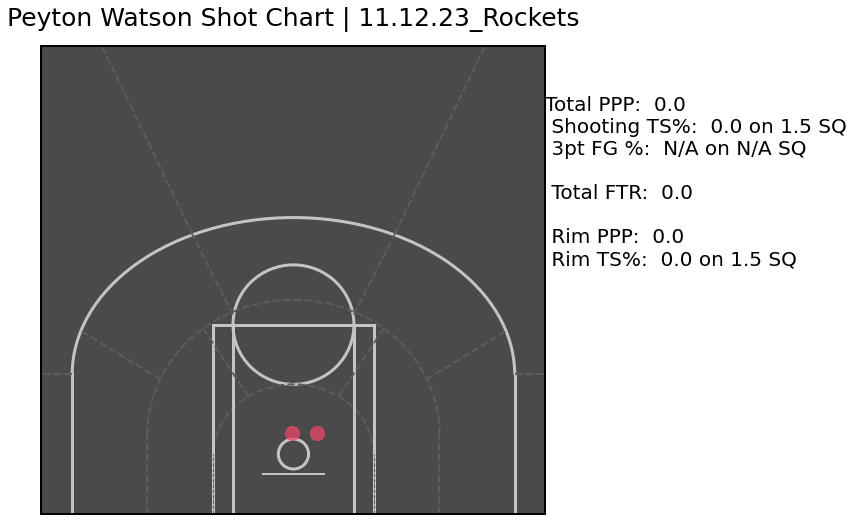

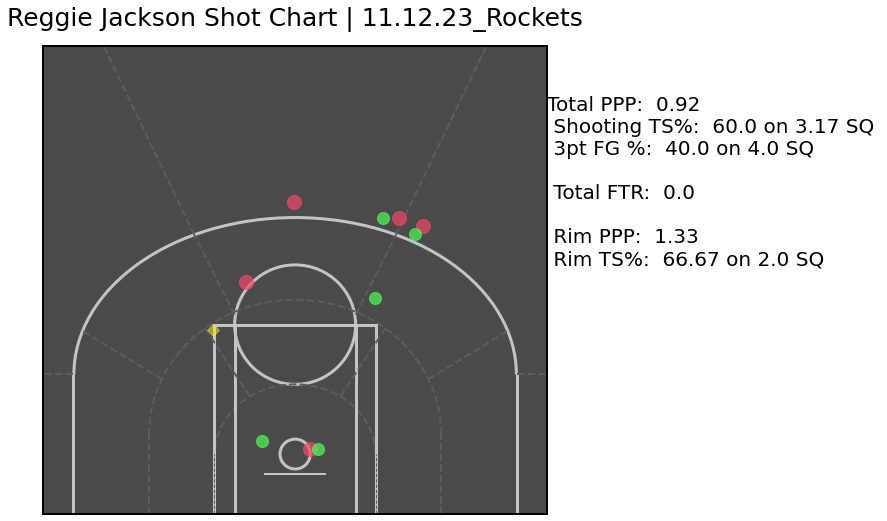

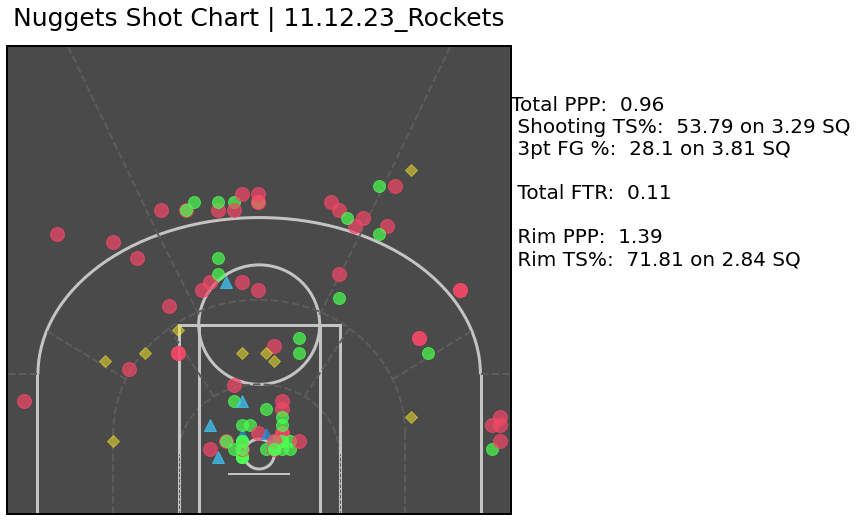

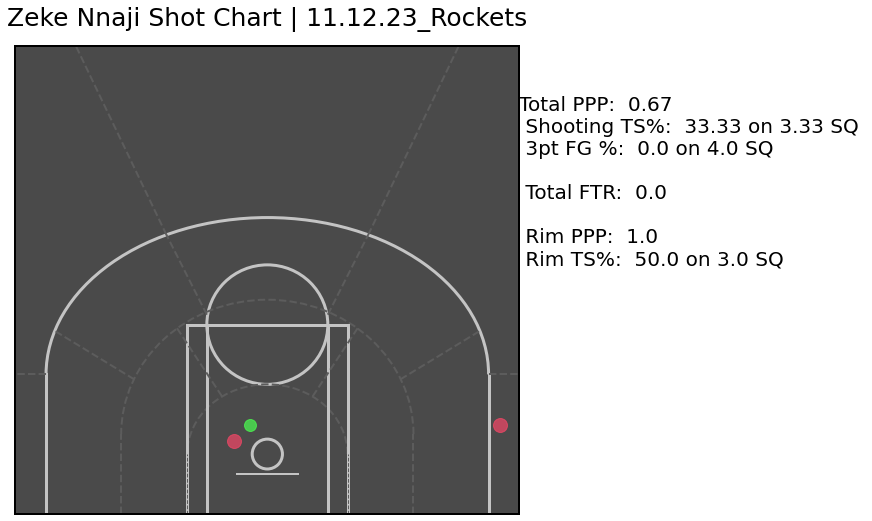

FileNotFoundError: [Errno 2] No such file or directory: 'data/11.12.23_Rockets/Nuggets/Offense/Aaron Gordon-checkpoint.json'

In [10]:
total_folder = 'Nuggets/!season_totals'
game_dir = 'data/11.08.23_Warriors/Nuggets/Offense'

players = []
for subdir, dirs, files in os.walk(game_dir):
    for file in files:
        player = file[:-5]
        players.append(player)
        
for player in players:
    if player != 'Justin Holiday':
        get_stats('Nuggets', player, game)

In [ ]:
off_PPP, off_rim_PPP, shot_chart = get_stats('Nuggets', 'Michael Porter Jr.', game)

In [5]:
off_PPP

,Total PPP,% of Poss.,Total TO,Total Creation %,Total FTR,Total TS%,Total SQ,Total 2pt FGA,Total 2pt FG%,Total 2pt SQ,Total 3pt FGA,Total 3pt FG%,Total 3pt SQ,Shooting PPP,% of Shooting Poss.,Shooting TO,Shooting Freq.,Shooting FTR,Shooting TS%,Shooting SQ,Shooting 2pt Poss.,Shooting 2pt FG%,Shooting 2pt SQ,Shooting 3pt Poss.,Shooting 3pt FG%,Shooting 3pt SQ,Creation PPP,% of Creation Poss.,Creation TO,Creation %,Creation FTR,Creation TS%,Creation SQ,Creation 2pt Poss.,Creation 2pt FG%,Creation 2pt SQ,Creation 3pt Poss.,Creation 3pt FG%,Creation 3pt SQ
PNR Ball Handler,1.09,17.5,0,31.8,0.0,54.55,3.09,15,60.0,2.6,7,28.6,4.14,1.2,14.6,0,68.2,0.0,60.0,3.2,10,60.0,2.9,5,40.0,3.8,0.86,30.4,0,31.8,0.0,42.86,2.86,5,60.0,2.0,2,0.0,3.8
PNR Screener,0.87,5.5,1,14.5,0.4,51.02,2.8,3,66.7,1.67,2,0.0,4.5,1.02,5.7,1,85.5,0.5,61.48,2.5,4,66.7,1.67,1,0.0,5.0,0.0,4.3,0,14.5,0.0,0.0,4.0,0,N/A,N/A,1,0.0,5.0
DHO Ball Handler,0.67,4.8,0,16.7,0.0,33.33,3.33,3,66.7,3.0,3,0.0,3.67,0.8,4.9,0,83.3,0.0,40.0,3.4,3,66.7,3.0,2,0.0,4.0,0.0,4.3,0,16.7,0.0,0.0,3.0,0,N/A,N/A,1,0.0,4.0
DHO Screener,N/A,0.0,0,0,0.0,N/A,0,0,N/A,N/A,0,N/A,N/A,N/A,0.0,0,0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A,N/A,0.0,0,0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A
ISOLATION,0.78,35.7,5,22.2,0.25,45.29,2.81,26,38.5,2.58,10,30.0,3.4,0.69,33.9,5,77.8,0.35,41.9,2.5,33,36.0,2.48,1,0.0,3.0,1.1,43.5,0,22.2,0.0,55.0,3.6,1,100.0,5.0,9,33.3,3.0
TRANSITION,1.08,5.9,2,13.4,0.2,73.53,2.8,3,66.7,2.0,2,50.0,4.0,0.93,6.3,2,86.6,0.25,67.57,2.25,3,50.0,0.5,3,50.0,4.0,2.0,4.3,0,13.4,0.0,100.0,5.0,1,100.0,5.0,0,N/A,4.0
Attacking Closeouts,1.75,3.2,0,0.0,0.0,87.5,4.5,2,100.0,4.5,2,50.0,4.5,1.75,3.9,0,100.0,0.0,87.5,4.5,2,100.0,4.5,2,50.0,4.5,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,4.5
Catch & Shoot,0.56,12.7,0,0.0,0.0,28.12,3.69,0,N/A,N/A,16,18.8,3.69,0.56,15.5,0,100.0,0.0,28.12,3.69,0,N/A,N/A,16,18.8,3.69,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,3.69
Off Ball Screens,1.6,4.0,0,0.0,0.0,80.0,4.0,2,50.0,4.5,3,66.7,3.67,1.6,4.9,0,100.0,0.0,80.0,4.0,2,50.0,4.5,3,66.7,3.67,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,3.67
Cutting,1.33,4.8,1,16.7,0.0,80.0,3.8,5,80.0,3.8,0,N/A,N/A,1.2,4.9,1,83.3,0.0,75.0,3.75,5,75.0,3.75,0,N/A,N/A,2.0,4.3,0,16.7,0.0,100.0,4.0,1,100.0,4.0,0,N/A,N/A


In [2]:
file_path = 'data/!season_totals/Nuggets/Offense/Team.json'
defense_path = 'data/!season_totals/Nuggets/Defense/Peyton Watson.json'

opp_off_path = 'data/11.08.23_Warriors/Warriors/Offense/Team.json'
opp_def_path = 'data/11.08.23_Warriors/Warriors/Defense/Team.json'

player_path = 'data/11.08.23_Warriors/Warriors/Offense/Stephen Curry.json'
player_def_path = 'data/!season_totals/Nuggets/Defense/Kentavious Caldwell-Pope.json'

with open (file_path, 'r') as f:
    offense_file = json.load(f)
    
with open (defense_path, 'r') as d:
    defense_file = json.load(d)
    
with open (opp_off_path, 'r') as o:
    opp_off_file = json.load(o)
    
with open (opp_def_path, 'r') as r:
    opp_def_file = json.load(r)
    
with open (player_path, 'r') as p:
    player_off_file = json.load(p)
    
with open (player_def_path, 'r') as t:
    player_def_file = json.load(t)
    
print(offense_file.keys())

dict_keys(['ovr_data', 'SMZ2', 'Rim', '3ptZ4', '3ptZ3', 'LMZ3', '3ptZ2', 'SMZ3', '3ptZ1', '3ptZ5', 'LMZ4', 'SMZ1', 'LMZ5', 'LMZ2', 'LMZ1', 'SMZ1 '])


In [3]:
data_PPP = offense_file['ovr_data']['data']
data_PPP = pd.DataFrame(data_PPP).transpose()
data_PPP = PPP(data_PPP)

rim_PPP = offense_file['Rim']['data']
rim_PPP = pd.DataFrame(rim_PPP).transpose()
rim_PPP = PPP(rim_PPP)

print('NUGGETS OFFENSE PPP')
data_PPP

NUGGETS OFFENSE PPP


,Total PPP,% of Poss.,Total TO,Total Creation %,Total FTR,Total TS%,Total SQ,Total 2pt FGA,Total 2pt FG%,Total 2pt SQ,Total 3pt FGA,Total 3pt FG%,Total 3pt SQ,Shooting PPP,% of Shooting Poss.,Shooting TO,Shooting Freq.,Shooting FTR,Shooting TS%,Shooting SQ,Shooting 2pt Poss.,Shooting 2pt FG%,Shooting 2pt SQ,Shooting 3pt Poss.,Shooting 3pt FG%,Shooting 3pt SQ,Creation PPP,% of Creation Poss.,Creation TO,Creation %,Creation FTR,Creation TS%,Creation SQ,Creation 2pt Poss.,Creation 2pt FG%,Creation 2pt SQ,Creation 3pt Poss.,Creation 3pt FG%,Creation 3pt SQ
PNR Ball Handler,1.03,15.0,22,45.1,0.1,58.85,3.3,89,55.1,2.94,68,39.7,3.76,0.79,11.1,21,54.9,0.09,50.22,3.13,72,39.6,2.87,30,44.0,3.68,1.31,26.0,1,45.1,0.11,67.37,3.47,40,77.8,3.06,43,37.2,3.68
PNR Screener,1.31,5.0,8,14.2,0.31,77.59,3.31,32,78.1,2.91,16,43.8,4.12,1.3,5.8,8,85.8,0.33,79.62,3.33,39,85.2,2.89,14,38.5,4.23,1.35,2.7,0,14.2,0.25,67.57,3.25,5,40.0,3.0,3,66.7,4.23
DHO Ball Handler,1.24,4.7,5,31.0,0.0,67.92,3.51,29,72.4,3.38,24,41.7,3.67,1.3,4.4,5,69.0,0.0,74.29,3.4,25,70.0,3.3,15,53.3,3.53,1.11,5.6,0,31.0,0.0,55.56,3.72,9,77.8,3.56,9,22.2,3.53
DHO Screener,1.41,1.8,0,50.0,0.0,70.45,3.91,14,78.6,3.86,8,37.5,4.0,0.91,1.2,0,50.0,0.0,45.45,3.91,7,71.4,3.86,4,0.0,4.0,1.91,3.4,0,50.0,0.0,95.45,3.91,7,85.7,3.86,4,75.0,4.0
ISOLATION,0.95,22.3,37,25.4,0.24,56.8,2.77,159,53.5,2.52,58,34.5,3.45,0.82,22.5,37,74.6,0.28,52.19,2.52,174,50.0,2.45,32,21.7,2.91,1.32,21.8,0,25.4,0.15,67.74,3.33,35,67.7,2.81,35,42.9,2.91
TRANSITION,1.29,16.7,14,42.0,0.28,70.09,3.69,111,73.0,3.48,61,34.4,4.08,1.2,13.1,14,58.0,0.32,68.94,3.42,90,67.1,3.19,30,34.8,4.13,1.42,26.9,0,42.0,0.23,71.48,4.01,48,82.9,3.98,38,34.2,4.13
Attacking Closeouts,1.05,6.7,6,22.6,0.18,58.6,2.82,50,60.0,2.62,22,31.8,3.27,1.02,7.1,6,77.4,0.2,58.72,2.72,53,59.1,2.66,11,30.0,3.0,1.17,5.8,0,22.6,0.11,58.26,3.11,6,66.7,2.33,12,33.3,3.0
Catch & Shoot,1.18,12.8,2,0.6,0.0,59.55,3.78,3,66.7,2.0,154,39.6,3.81,1.17,17.2,2,99.4,0.0,59.29,3.79,3,50.0,2.0,155,39.6,3.81,2.0,0.3,0,0.6,0.0,100.0,2.0,1,100.0,2.0,0,N/A,3.81
Off Ball Screens,0.91,3.9,4,20.4,0.07,50.14,3.3,25,60.0,3.0,18,22.2,3.72,0.7,4.2,4,79.6,0.03,39.2,3.24,24,50.0,2.85,14,14.3,3.79,1.72,3.1,0,20.4,0.22,90.04,3.56,5,100.0,3.6,4,50.0,3.79
Cutting,1.48,5.8,2,4.2,0.27,77.76,3.23,60,71.7,3.22,2,100.0,3.5,1.43,7.5,2,95.8,0.29,75.2,3.2,68,71.2,3.2,0,N/A,N/A,2.67,0.9,0,4.2,0.0,133.33,3.67,1,100.0,4.0,2,100.0,N/A


OFFENSE SHOT CHART
--------------------------
Total PPP: 1.15
Shooting TS%: 61.24 on 3.32 SQ
3pt FG %: 36.5 on 3.73 SQ

Total FTR: 0.17

Rim PPP: 1.28
Rim TS%: 71.71 on 2.88 SQ


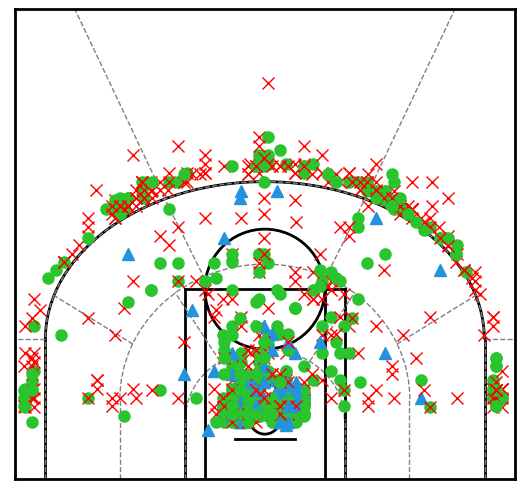

In [4]:
shots = offense_file['ovr_data']['shooting_locations']

off_PPP = data_PPP['Total PPP']['TOTAL']
off_total_SQ = data_PPP['Total SQ']['TOTAL']
off_shoot_TS = data_PPP['Shooting TS%']['TOTAL']
off_3pt_fg_per = data_PPP['Shooting 3pt FG%']['TOTAL']
off_3pt_SQ = data_PPP['Shooting 3pt SQ']['TOTAL']

off_FTR = data_PPP['Total FTR']['TOTAL']

off_rim_PPP = rim_PPP['Shooting PPP']['TOTAL']
off_rim_TS = rim_PPP['Shooting TS%']['TOTAL']
off_rim_SQ = rim_PPP['Shooting SQ']['TOTAL']

# General plot parameters
mpl.rcParams['font.family'] = 'Avenir'
mpl.rcParams['font.size'] = 18
mpl.rcParams['axes.linewidth'] = 2
# Draw basketball court
nugg_off_fig = plt.figure(figsize=(5, 4.7))
nugg_off_ax = nugg_off_fig.add_axes([0, 0, 1, 1])
nugg_off_ax = create_court(nugg_off_ax, 'black')

for shot in shots:
    x = shot[0][0]
    y = shot[0][1] + 60
    res = shot[1]
    if res == 1:
        nugg_off_ax.plot(x,y, marker='o', color='#29c42e', markersize=8)
    if res == 0:
        nugg_off_ax.plot(x,y, marker='x', color='red', markersize=9)
    if res == 11: # Free Throws
        nugg_off_ax.plot(x,y, marker='^', color='#2393de', markersize=9)
        '''
    if res == 20: # Turnovers
        nugg_off_ax.plot(x,y, marker='D', color='grey', markersize=6)
        '''
    if res == 30: # And-1
        nugg_off_ax.plot(x,y, marker='^', color='#2393de', markersize=9)

print(f'OFFENSE SHOT CHART')
print('--------------------------')
print(f'Total PPP: {off_PPP}')
print(f'Shooting TS%: {off_shoot_TS} on {off_total_SQ} SQ')
print(f'3pt FG %: {off_3pt_fg_per} on {off_3pt_SQ} SQ\n')

print(f'Total FTR: {off_FTR}\n')

print(f'Rim PPP: {off_rim_PPP}')
print(f'Rim TS%: {off_rim_TS} on {off_rim_SQ} SQ')
        
plt.show()

C:\Users\nickd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.2, "Nuggets FGA's 2023-24")

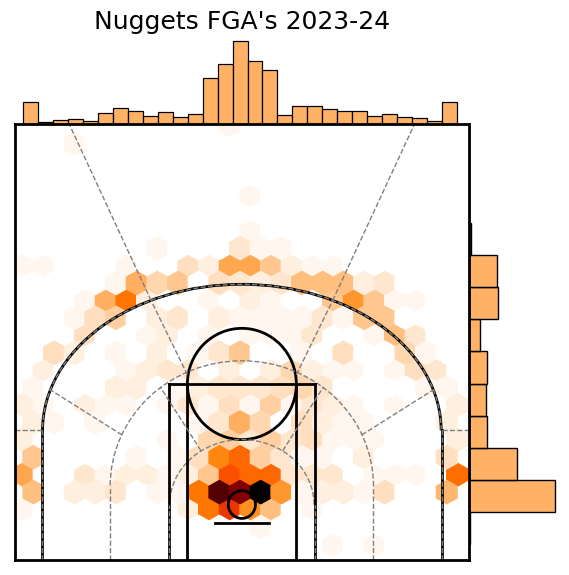

In [42]:
shots_x = [shot[0][0] for shot in offense_file['ovr_data']['shooting_locations']]
shots_y = [shot[0][1] + 60 for shot in offense_file['ovr_data']['shooting_locations']]
shots_results = [shot[1] for shot in offense_file['ovr_data']['shooting_locations']]

shots_df = pd.DataFrame(columns=['LOC_X', 'LOC_Y', 'RESULT'])
shots_df['LOC_X'] = shots_x
shots_df['LOC_Y'] = shots_y
shots_df['RESULT'] = shots_results

cmap=plt.cm.gist_heat_r
joint_shot_chart = sns.jointplot(shots_df.LOC_X, shots_df.LOC_Y,
                                 kind='hex', space=0, color=cmap(.2), cmap=cmap)

joint_shot_chart.fig.set_size_inches(7,6.5)

ax = joint_shot_chart.ax_joint
create_court(ax, 'black')

# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')

ax.set_title("Nuggets FGA's 2023-24", 
             y=1.2, fontsize=18)

In [6]:
opp_PPP = opp_off_file['ovr_data']['data']
opp_PPP = pd.DataFrame(opp_PPP).transpose()
opp_PPP = PPP(opp_PPP)

opp_rim_PPP = opp_off_file['Rim']['data']
opp_rim_PPP = pd.DataFrame(opp_rim_PPP).transpose()
opp_rim_PPP = PPP(opp_rim_PPP)
opp_PPP

,Total PPP,% of Poss.,Total TO,Total Creation %,Total FTR,Total TS%,Total SQ,Total 2pt FGA,Total 2pt FG%,Total 2pt SQ,Total 3pt FGA,Total 3pt FG%,Total 3pt SQ,Shooting PPP,% of Shooting Poss.,Shooting TO,Shooting Freq.,Shooting FTR,Shooting TS%,Shooting SQ,Shooting 2pt Poss.,Shooting 2pt FG%,Shooting 2pt SQ,Shooting 3pt Poss.,Shooting 3pt FG%,Shooting 3pt SQ,Creation PPP,% of Creation Poss.,Creation TO,Creation %,Creation FTR,Creation TS%,Creation SQ,Creation 2pt Poss.,Creation 2pt FG%,Creation 2pt SQ,Creation 3pt Poss.,Creation 3pt FG%,Creation 3pt SQ
PNR Ball Handler,0.8,22.9,2,40.9,0.19,42.81,2.7,16,43.8,2.31,11,18.2,3.27,0.81,17.9,2,59.1,0.06,45.62,2.75,12,40.0,2.5,6,33.3,3.17,0.78,38.7,0,40.9,0.36,39.18,2.64,7,50.0,2.0,5,0.0,3.17
PNR Screener,0.98,9.8,1,37.5,0.27,52.76,3.36,6,83.3,3.33,5,0.0,3.4,0.84,8.1,1,62.5,0.5,47.81,2.5,5,66.7,1.67,3,0.0,3.33,1.2,15.2,0,37.5,0.0,60.0,4.4,3,100.0,5.0,2,0.0,3.33
DHO Ball Handler,1.32,6.1,1,12.0,0.5,75.14,3.0,1,100.0,0.0,5,40.0,3.6,1.09,7.1,1,88.0,0.6,63.29,2.6,3,100.0,0.0,4,25.0,3.25,3.0,3.0,0,12.0,0.0,150.0,5.0,0,N/A,N/A,1,100.0,3.25
DHO Screener,N/A,0.0,0,0,0.0,N/A,0,0,N/A,N/A,0,N/A,N/A,N/A,0.0,0,0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A,N/A,0.0,0,0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A
ISOLATION,0.98,22.5,3,22.5,0.24,56.05,2.48,17,41.2,2.35,8,50.0,2.75,1.01,23.1,3,77.5,0.21,59.06,2.47,17,42.9,2.5,6,60.0,2.4,0.87,20.8,0,22.5,0.33,46.58,2.5,3,33.3,1.67,3,33.3,2.4
TRANSITION,1.27,13.3,1,31.9,1.6,79.86,4.1,6,83.3,4.0,4,25.0,4.25,1.38,11.9,1,68.1,2.0,89.29,3.67,10,75.0,3.5,2,50.0,4.0,1.04,17.5,0,31.9,1.0,61.48,4.75,3,100.0,5.0,2,0.0,4.0
Attacking Closeouts,0.4,3.7,0,20.0,0.0,20.0,3.8,3,33.3,3.67,2,0.0,4.0,0.5,3.9,0,80.0,0.0,25.0,3.5,3,33.3,3.67,1,0.0,3.0,0.0,3.0,0,20.0,0.0,0.0,5.0,0,N/A,N/A,1,0.0,3.0
Catch & Shoot,0.82,8.1,0,0.0,0.0,40.91,3.82,0,N/A,N/A,11,27.3,3.82,0.82,10.7,0,100.0,0.0,40.91,3.82,0,N/A,N/A,11,27.3,3.82,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,3.82
Off Ball Screens,1.29,5.1,0,14.3,0.0,64.29,3.71,4,75.0,3.5,3,33.3,4.0,1.5,5.8,0,85.7,0.0,75.0,4.17,3,100.0,4.33,3,33.3,4.0,0.0,3.0,0,14.3,0.0,0.0,1.0,1,0.0,1.0,0,N/A,4.0
Cutting,1.14,5.8,0,0.0,0.29,60.48,3.14,7,57.1,3.14,0,N/A,N/A,1.14,7.7,0,100.0,0.29,60.48,3.14,7,57.1,3.14,0,N/A,N/A,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A


OPPONENT OFFENSE SHOT CHART
--------------------------
Total PPP: 1.0
True Shooting %: 57.38 on 3.12 SQ
3pt FG %: 31.4 on 3.4 SQ

Total FTR: 0.31

Rim PPP: 1.3
Rim TS%: 73.7 on 2.96 SQ


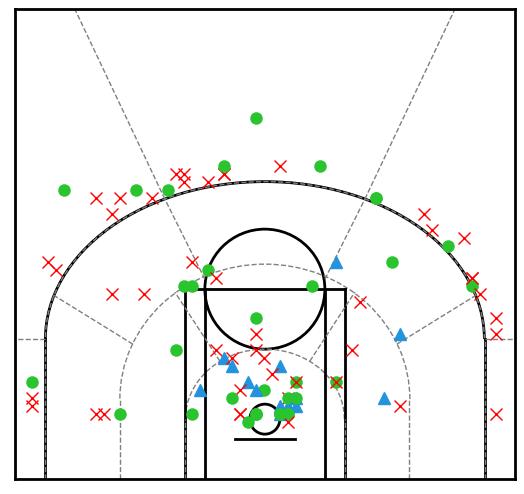

In [7]:
opp_shots = opp_off_file['ovr_data']['shooting_locations']

opp_off_PPP = opp_PPP['Total PPP']['TOTAL']
opp_total_SQ = opp_PPP['Total SQ']['TOTAL']
opp_shoot_TS = opp_PPP['Shooting TS%']['TOTAL']
opp_3pt_fg_per = opp_PPP['Shooting 3pt FG%']['TOTAL']
opp_3pt_SQ = opp_PPP['Shooting 3pt SQ']['TOTAL']

opp_FTR = opp_PPP['Total FTR']['TOTAL']

opp_off_rim_PPP = opp_rim_PPP['Shooting PPP']['TOTAL']
opp_rim_TS = opp_rim_PPP['Shooting TS%']['TOTAL']
opp_rim_SQ = opp_rim_PPP['Shooting SQ']['TOTAL']


# Draw basketball court
opp_fig = plt.figure(figsize=(5, 4.7))
opp_ax = opp_fig.add_axes([0, 0, 1, 1])
opp_ax = create_court(opp_ax, 'black')

for shot in opp_shots:
    x = shot[0][0]
    y = shot[0][1] + 60
    res = shot[1]
    if res == 1:
        opp_ax.plot(x,y, marker='o', color='#29c42e', markersize=8)
    if res == 0:
        opp_ax.plot(x,y, marker='x', color='red', markersize=9)
    if res == 11: # Free Throws
        opp_ax.plot(x,y, marker='^', color='#2393de', markersize=9)
        '''
    if res == 20: # Turnovers
        opp_ax.plot(x,y, marker='D', color='grey', markersize=6)
        '''
    if res == 30: # And-1
        opp_ax.plot(x,y, marker='^', color='#2393de', markersize=9)
    
print(f'OPPONENT OFFENSE SHOT CHART')
print('--------------------------')
print(f'Total PPP: {opp_off_PPP}')
print(f'True Shooting %: {opp_shoot_TS} on {opp_total_SQ} SQ')
print(f'3pt FG %: {opp_3pt_fg_per} on {opp_3pt_SQ} SQ\n')

print(f'Total FTR: {opp_FTR}\n')

print(f'Rim PPP: {opp_off_rim_PPP}')
print(f'Rim TS%: {opp_rim_TS} on {opp_rim_SQ} SQ')

plt.show()

In [8]:
player_PPP = player_off_file['ovr_data']['data']
player_PPP = pd.DataFrame(player_PPP).transpose()
player_PPP = PPP(player_PPP)

player_rim_PPP = player_off_file['Rim']['data']
player_rim_PPP = pd.DataFrame(player_rim_PPP).transpose()
player_rim_PPP = PPP(player_rim_PPP)
player_PPP

,Total PPP,% of Poss.,Total TO,Total Creation %,Total FTR,Total TS%,Total SQ,Total 2pt FGA,Total 2pt FG%,Total 2pt SQ,Total 3pt FGA,Total 3pt FG%,Total 3pt SQ,Shooting PPP,% of Shooting Poss.,Shooting TO,Shooting Freq.,Shooting FTR,Shooting TS%,Shooting SQ,Shooting 2pt Poss.,Shooting 2pt FG%,Shooting 2pt SQ,Shooting 3pt Poss.,Shooting 3pt FG%,Shooting 3pt SQ,Creation PPP,% of Creation Poss.,Creation TO,Creation %,Creation FTR,Creation TS%,Creation SQ,Creation 2pt Poss.,Creation 2pt FG%,Creation 2pt SQ,Creation 3pt Poss.,Creation 3pt FG%,Creation 3pt SQ
PNR Ball Handler,1.05,50.6,2,47.9,0.42,59.86,2.42,5,60.0,1.2,7,28.6,3.29,1.07,36.7,2,52.1,0.17,69.88,2.5,4,50.0,1.0,4,50.0,3.25,1.03,86.2,0,47.9,0.67,51.55,2.33,4,66.7,1.33,3,0.0,3.25
PNR Screener,N/A,0.0,0,0,0.0,N/A,0,0,N/A,N/A,0,N/A,N/A,N/A,0.0,0,0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A,N/A,0.0,0,0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A
DHO Ball Handler,1.29,12.1,1,0.0,1.0,86.81,3.5,0,N/A,N/A,2,50.0,3.5,1.29,16.9,1,100.0,1.0,86.81,3.5,1,N/A,N/A,2,50.0,3.5,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,3.5
DHO Screener,N/A,0.0,0,0,0.0,N/A,0,0,N/A,N/A,0,N/A,N/A,N/A,0.0,0,0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A,N/A,0.0,0,0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A
ISOLATION,0.75,12.5,0,0.0,0.0,37.5,3.25,2,0.0,4.0,2,50.0,2.5,0.75,17.4,0,100.0,0.0,37.5,3.25,2,0.0,4.0,2,50.0,2.5,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,2.5
TRANSITION,1.33,11.8,0,50.0,2.0,86.81,4.0,0,N/A,N/A,2,50.0,4.0,2.66,8.2,0,50.0,2.0,132.98,3.0,0,N/A,N/A,1,100.0,3.0,0.0,20.9,0,50.0,2.0,0.0,5.0,0,N/A,N/A,1,0.0,3.0
Attacking Closeouts,0.0,3.1,0,0.0,0.0,0.0,3.0,0,N/A,N/A,1,0.0,3.0,0.0,4.3,0,100.0,0.0,0.0,3.0,0,N/A,N/A,1,0.0,3.0,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,3.0
Catch & Shoot,0.0,6.2,0,0.0,0.0,0.0,4.0,0,N/A,N/A,2,0.0,4.0,0.0,8.7,0,100.0,0.0,0.0,4.0,0,N/A,N/A,2,0.0,4.0,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,4.0
Off Ball Screens,3.0,3.1,0,0.0,0.0,150.0,4.0,0,N/A,N/A,1,100.0,4.0,3.0,4.3,0,100.0,0.0,150.0,4.0,0,N/A,N/A,1,100.0,4.0,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,4.0
Cutting,0.0,3.1,0,0.0,0.0,0.0,1.0,1,0.0,1.0,0,N/A,N/A,0.0,4.3,0,100.0,0.0,0.0,1.0,1,0.0,1.0,0,N/A,N/A,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A


INGRAM OVR TEAM SHOT CHART
---------------------------
Total PPP: 1.0
Total TS%: 56.98 on 2.92 SQ
Total 3pt%: 46.2 on 3.41 SQ

Total FTR: 0.28

Rim PPP: 1.29
Rim TS%: 71.59 on 1.33 SQ


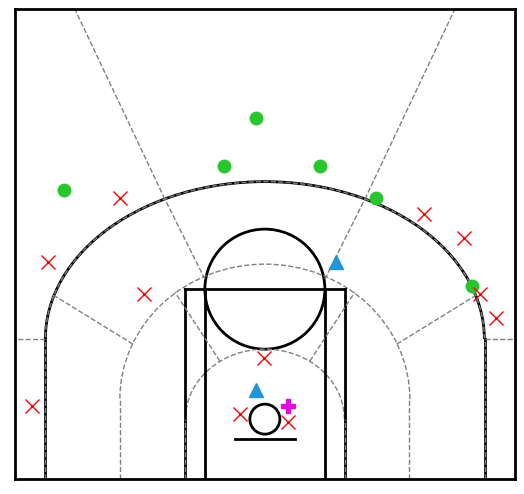

In [9]:
player_shots = player_off_file['ovr_data']['shooting_locations']

player_total_PPP = player_PPP['Total PPP']['TOTAL']
player_ovr_ts_per = player_PPP['Total TS%']['TOTAL']
player_ovr_3pt_per = player_PPP['Shooting 3pt FG%']['TOTAL']
player_ovr_SQ = player_PPP['Total SQ']['TOTAL']
player_ovr_3pt_SQ = player_PPP['Total 3pt SQ']['TOTAL']

player_ovr_ftr = player_PPP['Shooting FTR']['TOTAL']

player_rim_total_PPP = player_rim_PPP['Total PPP']['TOTAL']
player_rim_ts_per = player_rim_PPP['Total TS%']['TOTAL']
player_rim_SQ = player_rim_PPP['Total SQ']['TOTAL']

# General plot parameters
mpl.rcParams['font.family'] = 'Avenir'
mpl.rcParams['font.size'] = 18
mpl.rcParams['axes.linewidth'] = 2
# Draw basketball court
fig = plt.figure(figsize=(5, 4.7))
ax = fig.add_axes([0, 0, 1, 1])
ax = create_court(ax, 'black')

for shot in player_shots:
    x = shot[0][0]
    y = shot[0][1] + 60
    res = shot[1]
    if res == 1:
        ax.plot(x,y, marker='o', color='#29c42e', markersize=9)
    if res == 0:
        ax.plot(x,y, marker='x', color='red', markersize=10)
    if res == 11: # Free Throws
        ax.plot(x,y, marker='^', color='#2393de', markersize=10)
        '''
    if res == 20: # Turnovers
        ax.plot(x,y, marker='D', color='#f5c133', markersize=8)
        '''
    if res == 30: # And-1
        ax.plot(x,y, marker='P', color='#e00ddd', markersize=10)
    
print('INGRAM OVR TEAM SHOT CHART')
print('---------------------------')
print(f'Total PPP: {player_total_PPP}')
print(f'Total TS%: {player_ovr_ts_per} on {player_ovr_SQ} SQ')
print(f'Total 3pt%: {player_ovr_3pt_per} on {player_ovr_3pt_SQ} SQ\n')
print(f'Total FTR: {player_ovr_ftr}\n')
print(f'Rim PPP: {player_rim_total_PPP}')
print(f'Rim TS%: {player_rim_ts_per} on {player_rim_SQ} SQ')
        
plt.show()

In [13]:
player_def_PPP = player_def_file['ovr_data']['data']
player_def_PPP = pd.DataFrame(player_def_PPP).transpose()
player_def_PPP = defense_PPP(player_def_PPP)

player_def_rim_PPP = player_def_file['Rim']['data']
player_def_rim_PPP = pd.DataFrame(player_def_rim_PPP).transpose()
player_def_rim_PPP = defense_PPP(player_def_rim_PPP)
player_def_PPP

,Total PPP,% of Poss.,Total TO,Total Creation %,Total FTR,Total TS%,Total SQ,Total 2pt FGA,Total 2pt FG%,Total 2pt SQ,Total 3pt FGA,Total 3pt FG%,Total 3pt SQ,Shooting PPP,% of Shooting Poss.,Shooting TO,Shooting Freq.,Shooting FTR,Shooting TS%,Shooting SQ,Shooting 2pt Poss.,Shooting 2pt FG%,Shooting 2pt SQ,Shooting 3pt Poss.,Shooting 3pt FG%,Shooting 3pt SQ,Creation PPP,% of Creation Poss.,Creation TO,Creation %,Creation FTR,Creation TS%,Creation SQ,Creation 2pt Poss.,Creation 2pt FG%,Creation 2pt SQ,Creation 3pt Poss.,Creation 3pt FG%,Creation 3pt SQ
PNR Ball Handler,0.0,12.5,0,100.0,0.0,0.0,3.0,1,0.0,3.0,0,N/A,N/A,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A,0.0,50.0,0,100.0,0.0,0.0,3.0,1,0.0,3.0,0,N/A,N/A
PNR Screener,N/A,0.0,0,0,0.0,N/A,0,0,N/A,N/A,0,N/A,N/A,N/A,0.0,0,0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A,N/A,0.0,0,0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A
DHO Ball Handler,N/A,0.0,0,0,0.0,N/A,0,0,N/A,N/A,0,N/A,N/A,N/A,0.0,0,0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A,N/A,0.0,0,0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A
DHO Screener,N/A,0.0,0,0,0.0,N/A,0,0,N/A,N/A,0,N/A,N/A,N/A,0.0,0,0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A,N/A,0.0,0,0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A
ISOLATION,0.75,50.0,1,0.0,0.0,50.0,3.33,2,0.0,4.0,1,100.0,2.0,0.75,66.7,1,100.0,0.0,50.0,3.33,2,0.0,4.0,2,100.0,2.0,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,2.0
TRANSITION,N/A,0.0,0,0,0.0,N/A,0,0,N/A,N/A,0,N/A,N/A,N/A,0.0,0,0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A,N/A,0.0,0,0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A
Attacking Closeouts,0.0,12.5,0,100.0,0.0,0.0,3.0,0,N/A,N/A,1,0.0,3.0,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A,0.0,50.0,0,100.0,0.0,0.0,3.0,0,N/A,N/A,1,0.0,N/A
Catch & Shoot,0.0,12.5,0,0.0,0.0,0.0,5.0,0,N/A,N/A,1,0.0,5.0,0.0,16.7,0,100.0,0.0,0.0,5.0,0,N/A,N/A,1,0.0,5.0,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,5.0
Off Ball Screens,3.0,12.5,0,0.0,0.0,150.0,4.0,0,N/A,N/A,1,100.0,4.0,3.0,16.7,0,100.0,0.0,150.0,4.0,0,N/A,N/A,1,100.0,4.0,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,4.0
Cutting,N/A,0.0,0,0,0.0,N/A,0,0,N/A,N/A,0,N/A,N/A,N/A,0.0,0,0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A,N/A,0.0,0,0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A


KCP OVR DEFENSE SHOT CHART
---------------------------
Total PPP: 0.75
Total TS%: 42.86 on 3.57 SQ
Total 3pt%: 66.7 on 3.5 SQ

Total TO%: 12.5

Rim PPP: 0.0
Rim TS%: 0.0 on 5.0 SQ


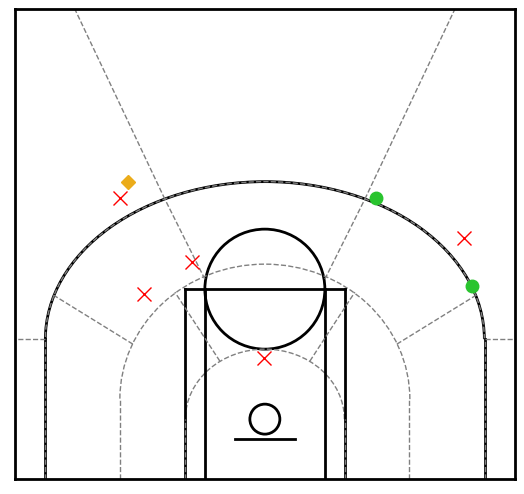

In [14]:
player_def_shots = player_def_file['ovr_data']['shooting_locations']

player_def_total_PPP = player_def_PPP['Total PPP']['TOTAL']
player_def_ovr_ts_per = player_def_PPP['Total TS%']['TOTAL']
player_def_ovr_3pt_per = player_def_PPP['Shooting 3pt FG%']['TOTAL']
player_def_ovr_SQ = player_def_PPP['Total SQ']['TOTAL']
player_def_ovr_3pt_SQ = player_def_PPP['Total 3pt SQ']['TOTAL']

player_def_ovr_to = player_def_PPP['Total TO']['TOTAL']

player_def_rim_total_PPP = player_def_rim_PPP['Total PPP']['TOTAL']
player_def_rim_ts_per = player_def_rim_PPP['Total TS%']['TOTAL']
player_def_rim_SQ = player_def_rim_PPP['Total SQ']['TOTAL']

# General plot parameters
mpl.rcParams['font.family'] = 'Avenir'
mpl.rcParams['font.size'] = 18
mpl.rcParams['axes.linewidth'] = 2
# Draw basketball court
fig = plt.figure(figsize=(5, 4.7))
ax = fig.add_axes([0, 0, 1, 1])
ax = create_court(ax, 'black')

for shot in player_def_shots:
    x = shot[0][0]
    y = shot[0][1] + 60
    res = shot[1]
    if res == 1:
        ax.plot(x,y, marker='o', color='#29c42e', markersize=9)
    if res == 0:
        ax.plot(x,y, marker='x', color='red', markersize=10)
    if res == 11: # Free Throws
        ax.plot(x,y, marker='^', color='#2393de', markersize=10)
    if res == 20: # Turnovers
        ax.plot(x,y, marker='D', color='#ebac1a', markersize=7)
    if res == 30: # And-1
        ax.plot(x,y, marker='P', color='#e00ddd', markersize=10)
    
print('KCP OVR DEFENSE SHOT CHART')
print('---------------------------')
print(f'Total PPP: {player_def_total_PPP}')
print(f'Total TS%: {player_def_ovr_ts_per} on {player_def_ovr_SQ} SQ')
print(f'Total 3pt%: {player_def_ovr_3pt_per} on {player_def_ovr_3pt_SQ} SQ\n')
print(f'Total TO%: {player_def_ovr_to}\n')
print(f'Rim PPP: {player_def_rim_total_PPP}')
print(f'Rim TS%: {player_def_rim_ts_per} on {player_def_rim_SQ} SQ')
        
plt.show()